## 平均ギアパワー

In [1]:
import re
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
from packages.japanize import japanize
import packages.db as db
from packages.i18n import Locale, Translator
import packages.image as image
import packages.definitions as d
import packages.utils as u
import packages.visualize as v

locale = Locale.JA
lobby = d.Lobby.XMATCH
date_from = dt.date(2023, 6, 1)
date_to = dt.date(2023, 6, 27)
battles = db.load_battles(lobby=lobby, date_from=date_from, date_to=date_to)
battles = battles[battles["season"] == "Sizzle Season 2023"]
players = u.to_players(battles)

バトル数: 30887


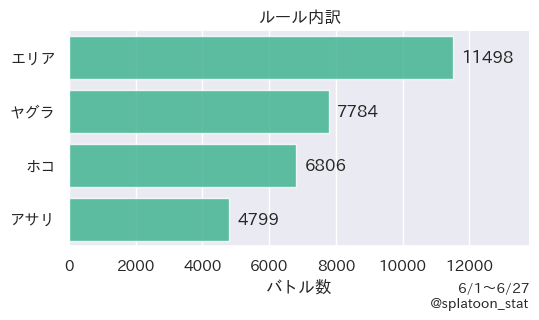

パワー不明バトル数: 3834


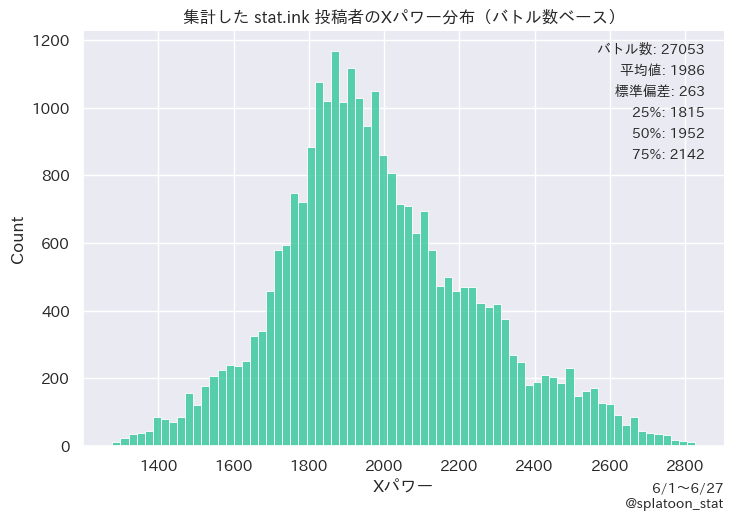

In [2]:
v.xmatch_mode_breakdown(battles, locale)
v.xmatch_power_distribution(battles, locale)

In [3]:
ability_cols = [x for x in players.columns if re.compile("^ability-.+").match(x)]
ability_cols = [x for x in ability_cols if x != "ability-ability_doubler"]

ブキごとのギアパワー平均値を計算する

In [4]:
ability_mean = players.groupby(["mode", "weapon"])[ability_cols].mean()
ability_mean = ability_mean.groupby("weapon").mean()
ability_mean = ability_mean.rename(columns=lambda x: re.sub("^ability-", "mean-", x))
ability_mean

,mean-ink_saver_main,mean-ink_saver_sub,mean-ink_recovery_up,mean-run_speed_up,mean-swim_speed_up,mean-special_charge_up,mean-special_saver,mean-special_power_up,mean-quick_respawn,mean-quick_super_jump,...,mean-last_ditch_effort,mean-tenacity,mean-comeback,mean-ninja_squid,mean-haunt,mean-thermal_ink,mean-respawn_punisher,mean-stealth_jump,mean-object_shredder,mean-drop_roller
weapon,,,,,,,,,,,,,,,,,,,,,
52gal,0.172199,0.151369,0.132443,0.155434,1.582793,0.218650,0.144246,0.087310,0.308446,0.279255,...,0.050701,0.003672,0.140855,0.474295,0.039068,0.002791,0.007208,0.616610,0.039011,0.022752
96gal,0.426873,0.153486,0.284274,0.183708,1.168412,0.348519,0.162184,0.195597,0.182233,0.247430,...,0.111231,0.009259,0.081755,0.118116,0.054203,0.011349,0.033339,0.413435,0.061824,0.013663
96gal_deco,0.324576,0.183235,0.198807,0.098703,1.013103,0.653177,0.196128,0.611307,0.118401,0.243175,...,0.063430,0.003086,0.054502,0.056400,0.025801,0.003148,0.006502,0.532542,0.056692,0.007788
bamboo14mk1,0.662190,0.379652,0.236686,0.682428,0.749102,0.571406,0.165643,0.168186,0.141872,0.293121,...,0.174941,0.013787,0.078657,0.081167,0.018195,0.042608,0.032557,0.239966,0.129047,0.011711
barrelspinner,0.192374,0.060623,0.087177,2.808870,0.330347,0.262266,0.083336,0.130063,0.030682,0.185832,...,0.039189,0.006790,0.004900,0.007127,0.006610,0.020111,0.013539,0.029570,0.179866,0.003644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tristringer,0.692576,0.259969,0.260353,0.669812,0.668216,0.717189,0.124126,0.193378,0.100973,0.325801,...,0.184912,0.021010,0.027696,0.014091,0.025121,0.301997,0.125484,0.052816,0.266887,0.019688
variableroller,0.574202,0.109793,0.190000,0.097473,0.977650,1.230386,0.222022,0.185690,0.128338,0.265893,...,0.163480,0.022169,0.065873,0.605043,0.005111,0.005012,0.012266,0.296923,0.014609,0.030647
wakaba,0.121635,2.269355,0.355577,0.086763,0.636349,0.362856,0.116537,0.044932,0.083566,0.135727,...,0.217074,0.002981,0.029434,0.100265,0.005138,0.001334,0.004365,0.105846,0.033783,0.010437


ブキごとのギアパワーの標準偏差を算出する

In [5]:
players_ability = players[["mode", "weapon"] + ability_cols].copy()
players_ability = players_ability.replace(True, 1.0).replace(False, 0.0)

df = pd.merge(players_ability, ability_mean, on="weapon")

for col in ability_cols:
    mean_col = re.sub("^ability-", "mean-", col)
    pow_col = re.sub("^ability-", "pow-", col)
    df[pow_col] = (df[col] - df[mean_col]).pow(2)

pow_cols = [re.sub("^ability-", "pow-", x) for x in ability_cols]
ability_std = df.groupby(["mode", "weapon"])[pow_cols].mean() ** (1/2)

ability_std = ability_std.groupby("weapon").mean()
ability_std = ability_std.rename(columns=lambda x: re.sub("^pow-", "std-", x))
ability_std


,std-ink_saver_main,std-ink_saver_sub,std-ink_recovery_up,std-run_speed_up,std-swim_speed_up,std-special_charge_up,std-special_saver,std-special_power_up,std-quick_respawn,std-quick_super_jump,...,std-last_ditch_effort,std-tenacity,std-comeback,std-ninja_squid,std-haunt,std-thermal_ink,std-respawn_punisher,std-stealth_jump,std-object_shredder,std-drop_roller
weapon,,,,,,,,,,,,,,,,,,,,,
52gal,0.424407,0.376382,0.276270,0.392416,0.920678,0.459260,0.238797,0.258097,0.671653,0.309368,...,0.217314,0.059832,0.347839,0.499339,0.193577,0.051843,0.084101,0.486181,0.191123,0.148207
96gal,0.626019,0.334791,0.443621,0.433053,0.844731,0.573313,0.273784,0.383735,0.454407,0.269418,...,0.286580,0.054666,0.268874,0.318674,0.221955,0.094161,0.154533,0.492266,0.211164,0.085581
96gal_deco,0.516072,0.434195,0.306236,0.311141,0.652331,0.704327,0.266103,0.599402,0.427574,0.273131,...,0.237381,0.030017,0.224439,0.228421,0.154924,0.046576,0.079353,0.498934,0.229077,0.086332
bamboo14mk1,0.737323,0.667260,0.373811,0.810270,0.735856,0.743089,0.312387,0.418713,0.446659,0.378252,...,0.375259,0.111504,0.267133,0.264625,0.132985,0.197582,0.173830,0.425500,0.317276,0.106840
barrelspinner,0.437045,0.213874,0.246375,1.018470,0.496666,0.493518,0.206254,0.358988,0.140067,0.237489,...,0.188689,0.081582,0.068977,0.080392,0.074990,0.137657,0.106830,0.167174,0.382339,0.058768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tristringer,0.765689,0.509053,0.412975,0.768646,0.681792,0.805535,0.248239,0.422519,0.339441,0.375647,...,0.386850,0.142981,0.159672,0.117765,0.155661,0.459036,0.331082,0.222198,0.441573,0.137838
variableroller,0.676202,0.274382,0.382693,0.280685,0.873415,1.065054,0.365536,0.464215,0.366980,0.362998,...,0.356682,0.141994,0.246953,0.488805,0.061527,0.066616,0.103843,0.456652,0.119532,0.170304
wakaba,0.327661,1.211212,0.433625,0.275741,0.696104,0.568704,0.219187,0.196443,0.324943,0.226570,...,0.408255,0.050981,0.168587,0.300204,0.069312,0.029253,0.065015,0.307341,0.165185,0.100849


In [6]:
from packages.master import Master, load_master

main = load_master(Master.MAIN_WEAPON)
df = pd.concat([main[["type-key"]], ability_mean], axis=1).rename(columns=lambda x: re.sub("mean-", "", x)).reindex(index=d.WEAPON_ORDER)
df

,type-key,ink_saver_main,ink_saver_sub,ink_recovery_up,run_speed_up,swim_speed_up,special_charge_up,special_saver,special_power_up,quick_respawn,...,last_ditch_effort,tenacity,comeback,ninja_squid,haunt,thermal_ink,respawn_punisher,stealth_jump,object_shredder,drop_roller
bold,shooter,0.150248,0.270990,0.113452,0.196409,2.558544,0.319057,0.171558,0.122013,0.289508,...,0.023485,0.003546,0.106716,0.322676,0.006881,0.002046,0.008098,0.217784,0.081056,0.036514
bold_neo,shooter,0.123811,0.118932,0.110971,0.230444,1.730315,0.358636,0.177861,0.096669,0.349778,...,0.030801,0.013480,0.140648,0.280826,0.001282,0.002336,0.011814,0.146186,0.072531,0.054400
wakaba,shooter,0.121635,2.269355,0.355577,0.086763,0.636349,0.362856,0.116537,0.044932,0.083566,...,0.217074,0.002981,0.029434,0.100265,0.005138,0.001334,0.004365,0.105846,0.033783,0.010437
momiji,shooter,0.201535,1.498850,0.368487,0.114329,0.779677,0.654726,0.142133,0.313887,0.121834,...,0.171098,0.005205,0.062703,0.173650,0.005722,0.001758,0.012667,0.137399,0.034465,0.012963
sharp,shooter,0.133220,0.452116,0.221061,0.202882,1.273298,0.400305,0.153893,0.097914,0.184245,...,0.091098,0.003033,0.092865,0.445095,0.018175,0.001380,0.003931,0.598033,0.138326,0.014249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tristringer,stringer,0.692576,0.259969,0.260353,0.669812,0.668216,0.717189,0.124126,0.193378,0.100973,...,0.184912,0.021010,0.027696,0.014091,0.025121,0.301997,0.125484,0.052816,0.266887,0.019688
lact450,stringer,0.221411,0.174103,0.144526,0.346760,0.726791,1.631059,0.332126,0.275603,0.279728,...,0.097913,0.033264,0.097952,0.053903,0.015967,0.006047,0.016998,0.320097,0.063619,0.021606
jimuwiper,wiper,0.748572,0.161366,0.243428,0.052263,0.929876,0.061753,0.071666,0.162967,0.676158,...,0.093816,0.001285,0.571032,0.085526,0.042730,0.005086,0.005211,0.807555,0.028722,0.029077
drivewiper,wiper,0.233696,0.553807,0.158756,0.098250,0.723345,0.203380,0.162802,0.076073,1.235677,...,0.074361,0.004257,0.363731,0.174873,0.101392,0.005880,0.004612,0.634494,0.034862,0.027091


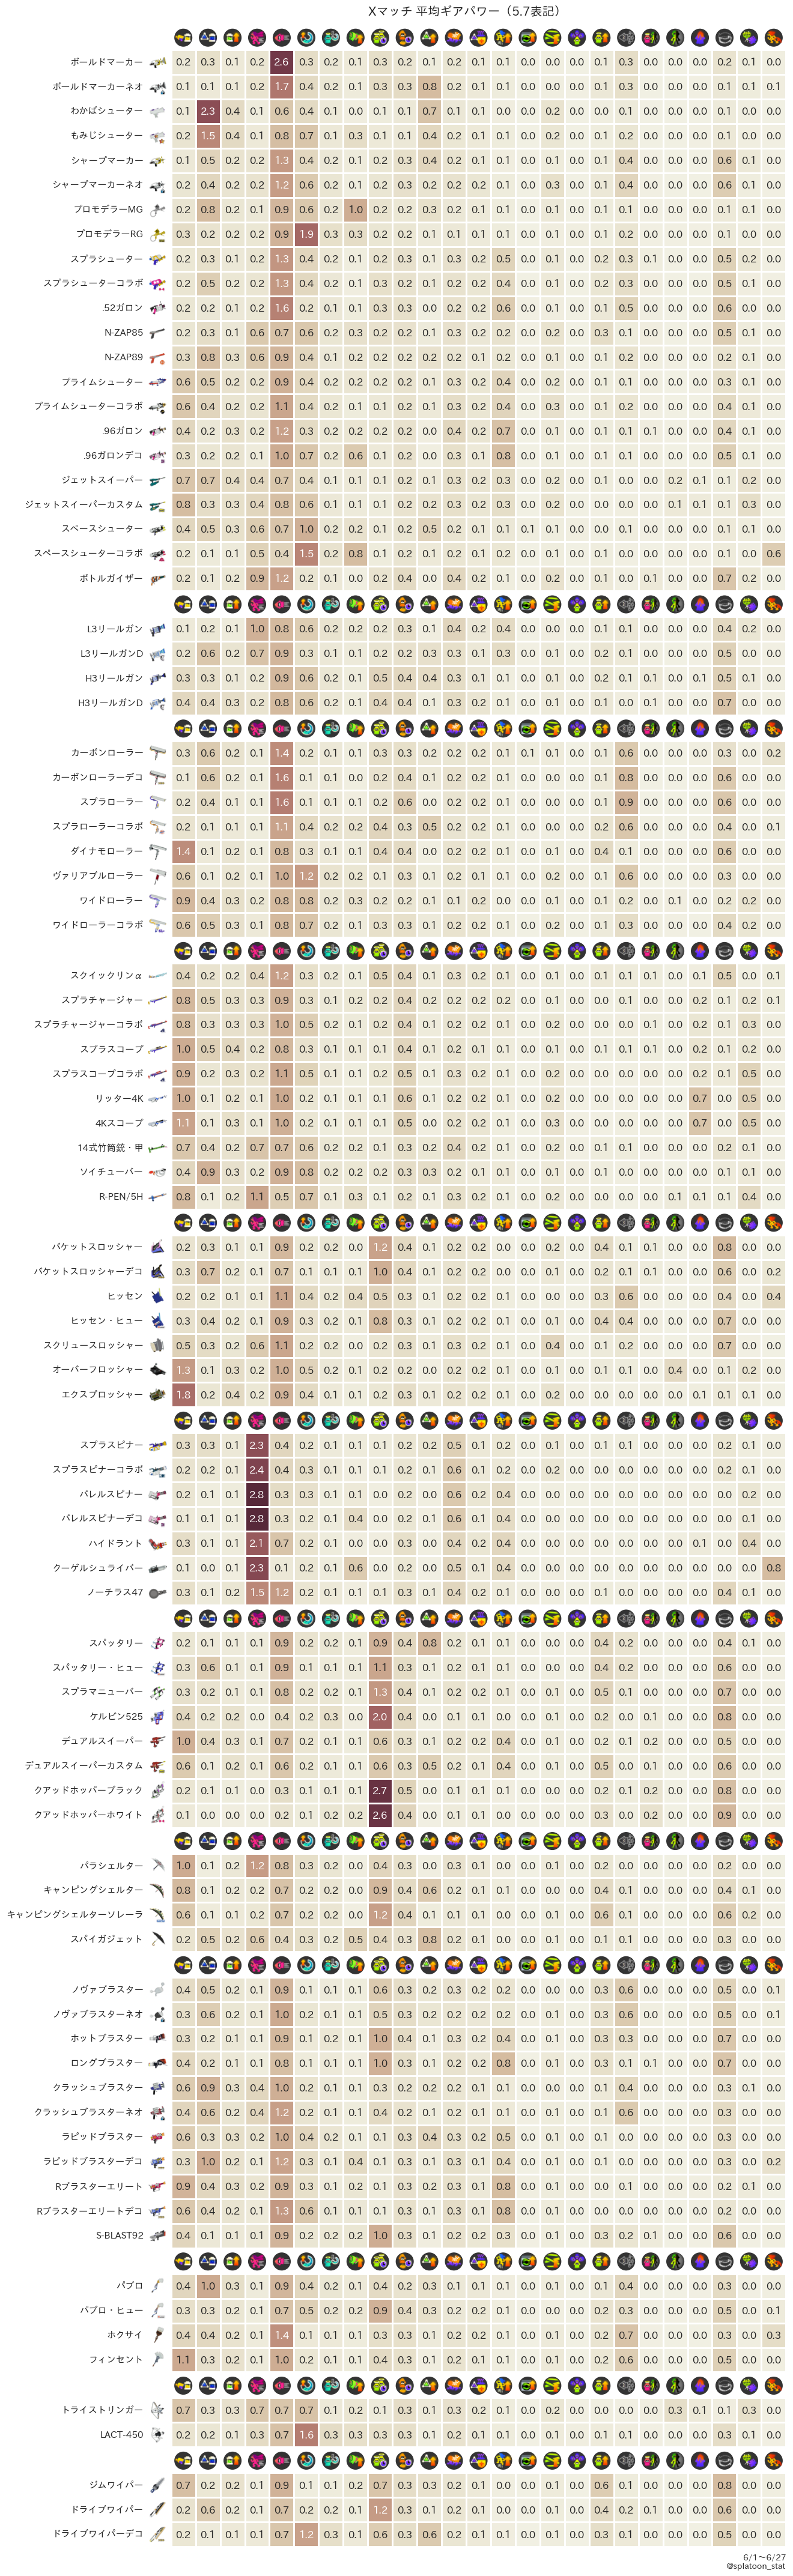

In [7]:
sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${lobby} 平均ギアパワー（5.7表記）", "Ability point averages in ${lobby}")

vmax = ability_mean.max().max()

fig, axes = plt.subplots(
    figsize=(15, len(df.index) * 0.6),
    nrows=len(d.TYPE_ORDER),
    gridspec_kw={
        "height_ratios": [len(df[df["type-key"] == x]) for x in d.TYPE_ORDER],
        "hspace": .14,
    },
)

fig.suptitle(
    i18n.t("title", lobby=i18n.t(lobby.value)),
    verticalalignment="bottom",
    y=0.89,
)

for i, weapon_type in enumerate(d.TYPE_ORDER):
    ax = axes[i]
    sns.heatmap(
        data=df[df["type-key"] == weapon_type].drop(columns="type-key"),
        square=True,
        annot=True,
        fmt=".1f",
        cbar=False,
        cmap=sns.color_palette("ch:start=.6,rot=.3,gamma=.8,light=.92", as_cmap=True),
        linewidths=2,
        vmin=0,
        vmax=vmax,
        ax=ax,
    )

    xkeys, ykeys = u.get_ax_ticklabels(ax)
    xticklabels = [i18n.t(x) for x in xkeys]
    yticklabels = [i18n.t(x) for x in ykeys]

    ax.set(
        xlabel="",
        ylabel="",
        xticklabels="",
    )
    ax.yaxis.set_ticklabels(yticklabels, x=-0.032)

    for i, key in enumerate(ykeys):
        image_path = image.get_image_path(key)
        img = OffsetImage(plt.imread(image_path), zoom=.65)
        img.image.axes = ax
        ab = AnnotationBbox(img, (0, 0), xybox=(-0.55, i + 0.5), frameon=False)
        ax.add_artist(ab)

    for i, key in enumerate(xkeys):
        image_path = image.get_image_path(key)
        img = OffsetImage(plt.imread(image_path), zoom=.65)
        img.image.axes = ax
        ab = AnnotationBbox(img, (0, 0), xybox=(i + 0.5, -0.5), frameon=False)
        ax.add_artist(ab)

        # background circle
        width = 0.7
        height = width * 1
        ax.add_patch(patches.Ellipse((i + 0.5, -0.5), width, height, color="#333", clip_on=False))

u.credit(ax, fig, i18n.t_data_duration(battles), 0.3)

plt.show()